In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np

In [4]:
# Define the path to the image in the parent directory
image_path = os.path.join('..', 'mask_2.png')  # Replace 'your_image.jpg' with your actual image file name

# Open the image
image = Image.open(image_path).convert('RGB')
image = np.array(image)

# Display the image
# plt.imshow(image)
# plt.axis('off')  # Hide the axis
# plt.show()

In [5]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Define a kernel for the morphological operations
kernel = np.ones((5, 5), np.uint8)

# Apply erosion
eroded_image = cv2.erode(gray_image, kernel, iterations=1)

# Apply dilation (opposite of erosion)
dilated_image = cv2.dilate(eroded_image, kernel, iterations=1)



In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')

plt.show()

Moments: {'m00': 8685888.0, 'm10': 5346032508.0, 'm01': 3388802380.0, 'm20': 3363388926428.0, 'm11': 2051502885520.0, 'm02': 1480788614644.0, 'm30': 2159698033227852.0, 'm21': 1270756148135360.0, 'm12': 882354028572384.0, 'm03': 709493737812004.0, 'mu20': 72986888479.46013, 'mu11': -34253652748.484135, 'mu02': 158646126657.31808, 'mu30': -261558085003.24594, 'mu21': 693937279938.8751, 'mu12': -2320785499314.0356, 'mu03': 7971829543017.305, 'nu20': 0.0009674229801883984, 'nu11': -0.000454023613208318, 'nu02': 0.0021028147910341502, 'nu30': -1.1763392454886578e-06, 'nu21': 3.1209345193424914e-06, 'nu12': -1.0437570924906454e-05, 'nu03': 3.58527473913903e-05}
Center: (615, 390)
Angle: -70.67419222309093
Major axis: 4703, Minor axis: 2351


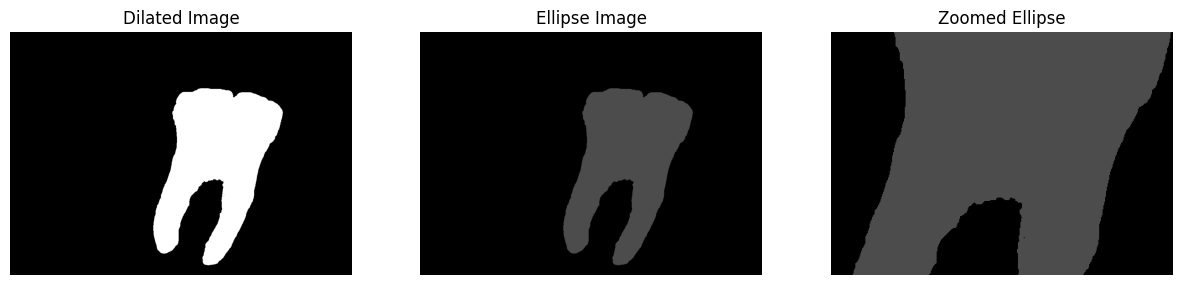

In [7]:
# Calculate moments of the dilated image
moments = cv2.moments(dilated_image)

# Print the moments
print("Moments:", moments)

# Check if m00 is zero
if moments['m00'] == 0:
    print("Error: m00 is zero. The image might be completely black.")
    center_x, center_y = dilated_image.shape[1] // 2, dilated_image.shape[0] // 2
else:
    # Calculate center of mass
    center_x = int(moments['m10'] / moments['m00'])
    center_y = int(moments['m01'] / moments['m00'])

# Calculate orientation
angle = 0.5 * np.arctan2(2 * moments['mu11'], moments['mu20'] - moments['mu02'])
angle = np.degrees(angle)

# Calculate axes lengths
area = moments['m00']
major_axis = int(np.sqrt((4 * area) / (np.pi * 0.5)))
minor_axis = int(np.sqrt((4 * area) / (np.pi * 2)))

# Print calculated parameters
print(f"Center: ({center_x}, {center_y})")
print(f"Angle: {angle}")
print(f"Major axis: {major_axis}, Minor axis: {minor_axis}")

# Create a color version of the dilated image
color_image = cv2.cvtColor(dilated_image, cv2.COLOR_GRAY2BGR)

# Draw the ellipse with a more visible color (e.g., red)
ellipse_image = cv2.ellipse(color_image, (center_x, center_y), (major_axis, minor_axis), 
                            angle, 0, 360, (0, 0, 255), 2)

# Display the original dilated image and ellipse image
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(ellipse_image, cv2.COLOR_BGR2RGB))
plt.title('Ellipse Image')
plt.axis('off')

# Add a zoomed-in view of the ellipse area
plt.subplot(1, 3, 3)
zoom_factor = 0.2  # Adjust this value to change the zoom level
y_start = max(0, center_y - int(dilated_image.shape[0] * zoom_factor))
y_end = min(dilated_image.shape[0], center_y + int(dilated_image.shape[0] * zoom_factor))
x_start = max(0, center_x - int(dilated_image.shape[1] * zoom_factor))
x_end = min(dilated_image.shape[1], center_x + int(dilated_image.shape[1] * zoom_factor))
plt.imshow(cv2.cvtColor(ellipse_image[y_start:y_end, x_start:x_end], cv2.COLOR_BGR2RGB))
plt.title('Zoomed Ellipse')
plt.axis('off')

plt.show()

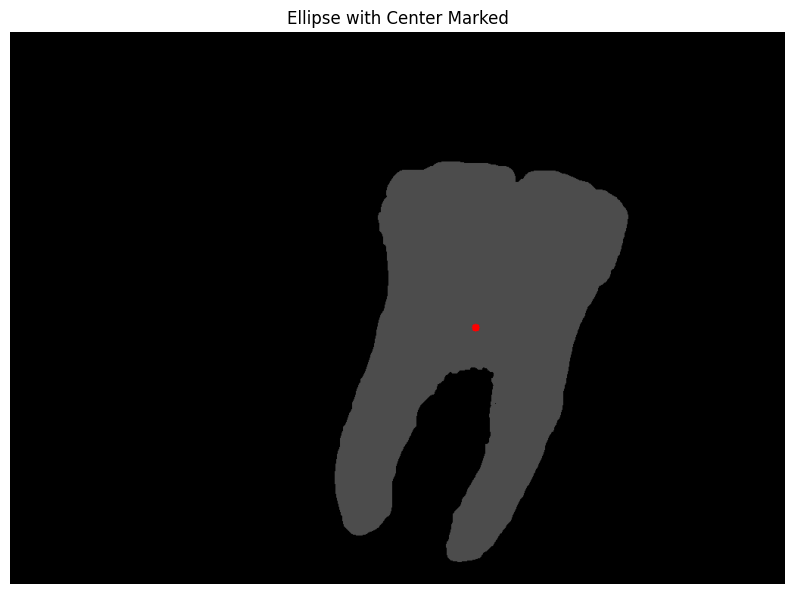

Center coordinates: (615, 390)


In [8]:
# Create a color version of the dilated image
color_image = cv2.cvtColor(dilated_image, cv2.COLOR_GRAY2BGR)

# Draw the ellipse with a more visible color (e.g., green)
ellipse_image = cv2.ellipse(color_image, (center_x, center_y), (major_axis, minor_axis), 
                            angle, 0, 360, (0, 255, 0), 2)

# Mark the center with a big red dot
cv2.circle(ellipse_image, (center_x, center_y), 5, (0, 0, 255), -1)

# Display the image with the ellipse and center dot
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(ellipse_image, cv2.COLOR_BGR2RGB))
plt.title('Ellipse with Center Marked')
plt.axis('off')
plt.show()

# Print the center coordinates
print(f"Center coordinates: ({center_x}, {center_y})")

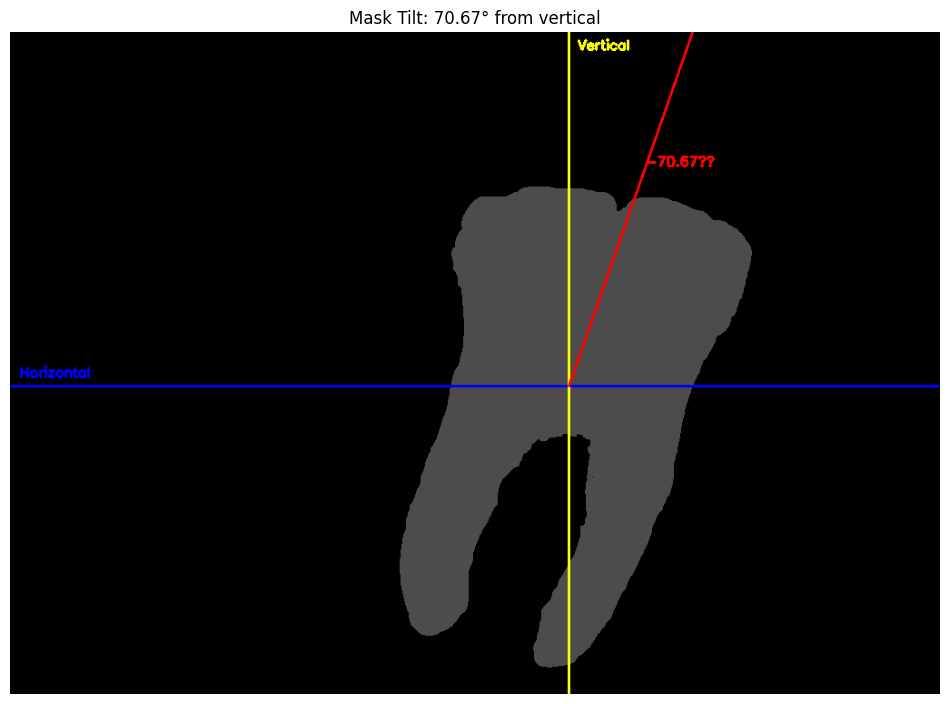

The mask is tilted 70.67 degrees from the vertical.
The angle of the major axis is -70.67 degrees from the horizontal.


In [21]:
# Calculate orientation
angle = 0.5 * np.arctan2(2 * moments['mu11'], moments['mu20'] - moments['mu02'])
angle_degrees = np.degrees(angle)

# Adjust the angle to be between -90 and 90 degrees
if angle_degrees > 90:
    angle_degrees -= 180
elif angle_degrees < -90:
    angle_degrees += 180

# Calculate the tilt from vertical
tilt_angle = abs(angle_degrees)

# Create a color version of the dilated image
color_image = cv2.cvtColor(dilated_image, cv2.COLOR_GRAY2BGR)

# Draw the ellipse
cv2.ellipse(color_image, (center_x, center_y), (major_axis, minor_axis), 
            angle_degrees, 0, 360, (0, 255, 0), 2)

# Draw horizontal line (blue)
cv2.line(color_image, (0, center_y), (color_image.shape[1], center_y), (255, 0, 0), 2)

# Draw vertical line (yellow)
cv2.line(color_image, (center_x, 0), (center_x, color_image.shape[0]), (0, 255, 255), 2)

# Calculate end points for the angle axis
length = max(color_image.shape) // 2
end_x = int(center_x + length * np.cos(np.radians(angle_degrees)))
end_y = int(center_y + length * np.sin(np.radians(angle_degrees)))

# Draw angle axis (red)
cv2.line(color_image, (center_x, center_y), (end_x, end_y), (0, 0, 255), 2)

# Add text labels
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(color_image, "Horizontal", (10, center_y - 10), font, 0.5, (255, 0, 0), 2)
cv2.putText(color_image, "Vertical", (center_x + 10, 20), font, 0.5, (0, 255, 255), 2)

# Calculate position for the angle label
label_x = center_x + (end_x - center_x) // 2
label_y = center_y + (end_y - center_y) // 2

# Add label for the angle axis with the angle value
cv2.putText(color_image, f"{angle_degrees:.2f}°", (label_x, label_y), font, 0.5, (0, 0, 255), 2)

# Display the image
plt.figure(figsize=(12, 12))
plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
plt.title(f'Mask Tilt: {tilt_angle:.2f}° from vertical')
plt.axis('off')
plt.show()

print(f"The mask is tilted {tilt_angle:.2f} degrees from the vertical.")
print(f"The angle of the major axis is {angle_degrees:.2f} degrees from the horizontal.")